___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://i.pinimg.com/originals/64/2b/4a/642b4a4eb254da80899e5700633aa789.jpg" width="500px" height="200px" />

# Actualización anaconda

## 0. Abrir terminal
Abrir una nueva terminal ya sea usando `anaconda prompt` o cualquier otra terminal. Verificar versión de python ejecutando el comando 
```
conda info
```
Si la versión de python que te arroja el comando anterior es `3.7.x` entonces vamos a proceder a desinstalar la versión de anaconda que tenemos instalada. De lo contrario ir al paso **2**.

## 1. Desinstalar anaconda

### - Usuarios mac o linux
1. Eliminar todo el directorio de instalación de anaconda tipicamente está ubicado en la siguiente dirección:
```
rm -rf ~/anaconda3
```
2. Elimine los siguientes archivos y directorios ocultos, que pueden haber sido creados en el directorio de inicio. Para ello use el siguiente comando:
```
rm -rf ~/.condarc ~/.conda ~/.continuum
```

### - Usuarios windows
En la carpeta donde instaló Anaconda (Ejemplo: `C:\Users\username\Anaconda3`) debe haber un ejecutable llamado Uninstall-Anaconda.exe. Haga doble clic en este archivo para comenzar a desinstalar Anaconda.


## 2. Descargar última versión de Anaconda desde su página
- Ir a el siguiente enlace y en la parte final de dicha página encontrar los archivos a descargar https://www.anaconda.com/products/individual.
![image.png](attachment:4986b1d5-4858-4738-8760-9f34f8a6b360.png)

- Luego de descargado el archivo de instalación, ejecutarlo para instalar la última versión de anaconda.

- Finalmente actualice anaconda a la última versión disponible. Para ello ejecute el siguiente comando
```
conda update -n base -c defaults conda
```
___

# Optimización de código 

In [1]:
# Librerías a usar en todo el programa
import numpy as np
import time,math 
import matplotlib.pyplot as plt

## Formas de optimizar el código en las `funciones` y los ciclos `for`

Para ilustrar el método usemos el siguiente ejemplo: Muestre en una lista cada una de las letras de la siguiente variable `oldlist = 'Este es el texto de ejemplo'` en letra mayúscula.

In [2]:
words = """
 In 1973, the Chicago Board of Options Exchange begun trading options in exchanges, although previously options 
 had been regularly traded by financial institutions in over the counter markets. In the same year, Black and 
 Scholes (1973), and Merton (1973), published their seminal papers on the theory of option pricing. Since then 
 the growth of the field of derivative securities has been phenomenal. In recognition of their pioneering and 
 fundamental contribution to option valuation, Scholes and Merton received in 1997 the Award of the Nobel Prize 
 in Economics. Unfortunately, Black was unable to receive the award since he had already passed away.

In essence, the Black-Scholes model states that by continuously adjusting the proportions of stocks and options 
in a portfolio, the investor can create a riskless hedge portfolio, where all market risks are eliminated. The 
ability to construct such a portfolio relies on the assumptions of continuous trading and continuous sample paths
of the asset price. In an efficient market with no riskless arbitrage opportunities, any portfolio with a zero 
market risk must have an expected rate of return equal to the risk-free interest rate. This approach led to the 
differential equation, known in physics as the "heat equation". Its solution is the Black-Scholes formula for 
pricing European options on non-dividend paying stocks 
"""

In [5]:
%%timeit
# Solucionarlo acá
sol1 = []
for w in words:
    sol1.append(w.upper())

125 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
sol1.append

<function list.append(object, /)>

In [10]:
str.

<method 'upper' of 'str' objects>

- **Evitando puntos ...**
 
Suponemos que no puedes usar la función `map` o una compresión de listas. Puede estar atascado con el bucle for. El ejemplo de bucle for tiene otra ineficiencia. Tanto `newlist.append ` como `word.upper` son referencias de funciones que se reevalúan cada vez a través del ciclo. El bucle original puede ser reemplazado por:

In [11]:
%%timeit
# Almacenando funciones en variables (eliminar "." en las iteraciones de los for)
sol2 = []
append = sol2.append
upper = str.upper
for w in words:
    append(upper(w))

107 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


- **Variables locales.**

La aceleración final disponible para nosotros para la versión que no es un `map` del bucle for, es usar variables locales siempre que sea posible. Si el ciclo anterior se convierte como una función, las variables append y upper se convierten en locales. Python accede a las variables locales de forma mucho más eficiente que las variables globales.

In [12]:
# Generación de función para utilizar variables locales
def append_words(words:str) -> list: 
    sol3 = []
    append = sol3.append
    upper = str.upper
    for w in words:
        append(upper(w))
    return sol3

In [13]:
%%timeit

sol3 = append_words(words)

105 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Funciones lambda

Las funciones `lambda` o funciones anónimas, son un tipo de función que introduce python en su estructura, en donde se usa frecuentemente en dos situaciones principales: (a) si la función es bastante simple, y (b) si solo se usará una vez. Las funciones de Lambda se pueden usar donde sea que se requieran objetos de función

Python utiliza dos formas distintas de crear funciones: usando la sintáxis `def` y `lambda`. A continuación se muestran dos ejemplos de los usos de estas dos sintaxis:

#### Ejemplo raiz cuadrada

In [17]:
###### Usando la sintáxis def
def square_root1(x):
    return np.sqrt(x)

###### Usando la sintaxis lambda
square_root2 = lambda x: np.sqrt(x)

print('Usando la sintáxis def obtenemos:',square_root1(42))
print('Usando la sintáxis lambda obtenemos:',square_root2(42))

Usando la sintáxis def obtenemos: 6.48074069840786
Usando la sintáxis lambda obtenemos: 6.48074069840786


In [19]:
square_root2 = 5
square_root2

5

Normalmente, las funciones se crean para uno de dos propósitos: **(a) reducir la duplicación de código, o (b) modularizar el código.**

Si tienes una función que es usada una única vez, no necesitas darle un nombre a la función. Puede ser 'anónima' y además puede definirla justo en el lugar donde desea usarlo. Ahí es donde `lambda` es útil.

## ¿Porqué el uso de la función lambda es en ocasiones confuso?

**Primero:** Lambda es confuso porque: el requisito de que una lambda **pueda tomar solo una expresión** plantea la pregunta: ¿Qué es una expresión?. En Python, ¿cuál es la diferencia entre una expresión y una declaración (statement)?. Una buena respuesta es que una <font color=red> expresión devuelve (o evalúa) un valor</font>, mientras que una declaración no.

Una pregunta que resulta entonces, es **¿qué tipo de cosas puedo, y no puedo, poner en una función lambda?** Y la respuesta a esa pregunta es básicamente
   - Si no devuelve un valor, no es una expresión y no se puede poner en una lambda.
   - Si puede imaginarlo en una declaración de asignación, en el lado derecho del signo igual, es una expresión y puede colocarse en una lambda.

Usando estas reglas podríamos entonces llegar a las siguientes conclusiones:

*1*. Los enunciados de asignación no se pueden usar en lambda. En Python, las declaraciones de asignación no devuelven nada, ni siquiera Ninguno (nulo).
     
**Ejemplo**

In [22]:
# Asignaciones en una función lambda
f1 = lambda x: x == 1
f1(1)

True

*2*. Cosas simples como operaciones matemáticas, operaciones de cadenas, comprensión de listas, etc. están bien en una lambda.

In [25]:
# Ejemplo
########## Sumar elemento a elemento de una lista
suma = lambda a,b: a+b
l1 = [1 ,2, 3]
l2 = [4, 5, 6]

# 1. Usando for
s1 = []
for i in range(len(l1)):
    s1.append(suma(l1[i], l2[i]))
s1

# 2. Usando compresión de listas
s2 = [suma(l1[i], l2[i]) for i in range(len(l1))]
s2

########## Obtener el mismo resultado usando vectores
s3 = np.array(l1) + np.array(l2)
s3

array([5, 7, 9])

*3*. Las llamadas a funciones son expresiones. Está bien colocar una llamada de función en un lambda y pasar argumentos a esa función. Al hacerlo, envuelve la llamada a la función (argumentos y todo) dentro de una nueva función anónima. Incluso la función `print` puede ser usada dentro de una función lambda.

- **Ejemplo** (compresión de listas)

In [28]:
a = print('1')
print(a)

1
None


In [36]:
palabra = 'hola grupo es la prueba'

# Poner print dentro de una lambda, que regrese la letra mayúscula del argumento
funUpper = lambda x: print(x.upper())

# Poner dentro de una lambda una función que regrese la letra mayúscula
funUpper2 = lambda x: x.upper()

print(funUpper(palabra))
print(funUpper2(palabra))

HOLA GRUPO ES LA PRUEBA
None
HOLA GRUPO ES LA PRUEBA


- **Ejemplo** (funciones anidadas)

In [40]:
def suma(a,b):
    return a+b

# función anónima
suma_potencia = lambda n,a,b: \
                print(f'la suma de {a} y {b} a la potencia {n} es: {suma(a, b)**n:.1f}')
suma_potencia(10,30.58,4.2)

la suma de 30.58 y 4.2 a la potencia 10 es: 2589976220384792.5


*4*. Las expresiones condicionales, son expresiones (y no simplemente una sintaxis diferente para una instrucción if / else). Devuelven un valor y se pueden usar en una lambda
   
**Ejemplo**

In [54]:
# Probar estas dos funciones

# Escribir función anónima que regrese True si x>y de lo contrario False
some_condition = lambda x, y: True if x > y else False

# Utilizar la función anterior como condición en una lambda
f1 = lambda x, y: x if some_condition(x, y) else y

# Crear una función que regrese 'big' si x>100 de lo contrario 'small'
f2 = lambda x: 'big' if x > 100 else 'small'

# Verificar f1 y f2 en la siguiente lista
l1 = [100,25,200,5]

# 1. Usando for
fun1 = []
fun2 = []
for i in range(len(l1)):
    if i != len(l1) - 1:
        fun1.append(f1(l1[i], l1[i+1]))

    fun2.append(f2(l1[i]))

# 2. Usando compresión de listas
com1 = [f1(l1[i], l1[i+1]) for i in range(len(l1)) if i != len(l1) - 1]
com2 = [f2(l1[i]) for i in range(len(l1))]
com2, fun2

(['small', 'small', 'big', 'small'], ['small', 'small', 'big', 'small'])

**Segundo:** Lambda es confuso porque: lambda generalmente se describe como una herramienta para crear funciones, pero una especificación lambda no contiene una declaración de **return**.

La declaración de *return* está, en cierto sentido, implícita en una lambda. Como una especificación lambda debe contener solo una expresión, y esa expresión debe devolver un valor, una función anónima creada por lambda devuelve implícitamente el valor devuelto por la expresión. Esto tiene perfecto sentido. Aún así, la falta de una declaración de *return* explícita es, creo, parte de lo que hace que sea difícil asimilar lambda, o al menos, difícil asimilarlo rápidamente.

**Ejemplo de combinación de los dos tipos de funciones**

In [56]:
# Crear una función que regrese una función anónima que sea un incremento de cierto valor n (entrada)
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(22)
i1 = 0; i2 = 5

print('Incrementar en %d unidades'% i1, f(i1),'\nIncrementar en %d unidades' %i2, f(i2))
f(100)
f(1)

Incrementar en 0 unidades 22 
Incrementar en 5 unidades 27


23

## - Función map()

Puedes pensar en la función `map()` como un `for` movido al código C. La única restricción es que el 'cuerpo de bucle' de la función `map` debe ser una llamada a función. Además del beneficio sintáctico de la compresión de listas, a menudo son tan rápidas o más rápidas que el uso equivalente del `map`. La sintaxis de la función es:

> `r = map(función, secuencia)`

Con Python 3, map () devuelve un iterador, si queremos obtener los valores numéricos debemos usar compresión de listas o el comando `list`.

**Ejemplos**

In [62]:
Celsius = [39.2, 36.5, 37.3, 37.8]

# Convierta las temperaturas en °C a frados fahrenheit --> eq = float(9)/5)*i + 32
celsius2fahrenheit = lambda t: (float(9)/5)*t + 32

# 1. Usando llenado de listas
s1 = []
for t in Celsius:
    s1.append(celsius2fahrenheit(t))

print('for clásico ', s1)
    
# 2. Usando funciones y compresión de listas
s2 = [celsius2fahrenheit(t) for t in Celsius]
print('compresión  ', s2)

# 3. Usando funciones y funciones map
s3 = list(map(celsius2fahrenheit, Celsius))
print('usando map  ', s3)

# 4. Usando vectores
s4 = celsius2fahrenheit(np.array(Celsius))
print('usando vectores ', s4)

# Comparar


for clásico  [102.56, 97.7, 99.14, 100.03999999999999]
compresión   [102.56, 97.7, 99.14, 100.03999999999999]
usando map   [102.56, 97.7, 99.14, 100.03999999999999]
usando vectores  [102.56  97.7   99.14 100.04]


In [16]:
# Ahora realizar el proceso inverso de fahrenheit a °C --> eq=float(5)/9)*(x-32)
Celsius = [39.2, 36.5, 37.3, 37.8]



[102.56, 97.7, 99.14, 100.03999999999999]
[39.2, 36.5, 37.300000000000004, 37.8]


In [65]:
# Tres métodos diferentes para aplicar una función a datos de una lista
oldlist = 'Este es el texto de ejemplo'

tiempo = []

In [66]:
%%timeit
############ Agregando letras mayúsculas a una lista
newlist1 = []
for w in oldlist:
    newlist1.append(w.upper())

2.69 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [67]:
%%timeit
############ Usando la función map
newlist2 = list(map(str.upper, oldlist))

1.44 µs ± 39.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [68]:
%%timeit
############ Usando compresión de listas
newlist3 = [w.upper() for w in oldlist]

2.22 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
print('Con el método de agregar datos a la lista:\n',newlist1)
print('Usando la funcion map:\n',newlist2)
print('U

In [64]:
sando compresión de listas:\n', newlist3)

Con el método de agregar datos a la lista:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']
Usando la funcion map:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']
Usando compresión de listas:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


- Mientras todavía utilizamos `lamda` como una función, podemos tener una lista de funciones como una secuencia:

**Ejemplo a)**: Construyamos un programa usando `map`, compresión de listas y estructura `for` típica para evaluar un vector de tamaño `N` para una lista de funciones

In [76]:
# Escribir el programa acá 
import math

N = 3
fns_np = [np.arctan, np.cos, np.sin]
fns_math = [math.atan, math.cos, math.sin]

xs = np.arange(N)

# 1.1 For típico (fns_math)
call = []
for f in fns_math:
    aux = []
    for i in xs:
        aux.append(f(i))
    call.append(aux)
    
# 1.2 For típico (fns_np)
call2 = []
for f in fns_np:
    call2.append(f(xs))

# 2. Compresión de listas
call3 = [f(xs) for f in fns_np]

# 3. Funciones map
call4 = list(map(lambda fi: fi(xs), fns_np))

print('f1 = ',call)
print('f2 = ',call2)
print('f3 = ',call3)
print('f4 = ',call4)


f1 =  [[0.0, 0.7853981633974483, 1.1071487177940906], [1.0, 0.5403023058681398, -0.4161468365471424], [0.0, 0.8414709848078965, 0.9092974268256817]]
f2 =  [array([0.        , 0.78539816, 1.10714872]), array([ 1.        ,  0.54030231, -0.41614684]), array([0.        , 0.84147098, 0.90929743])]
f3 =  [array([0.        , 0.78539816, 1.10714872]), array([ 1.        ,  0.54030231, -0.41614684]), array([0.        , 0.84147098, 0.90929743])]
f4 =  [array([0.        , 0.78539816, 1.10714872]), array([ 1.        ,  0.54030231, -0.41614684]), array([0.        , 0.84147098, 0.90929743])]


**Ejemplo b)**

In [16]:
def square(x):
        return (x**2)
def cube(x):
        return (x**3)

funcs = [square, cube]

# Combinar map y compresión de listas para evaluar números 0-5 de cada función en cada iteración 
N = 6

# 1. For clásico (método a olvidar)

print(value1)

# 2. Función map anidada
value2 = 
print(value2)

# 3. Compresión de listas anidadas
values3 = 
print(values3)

[[0, 0], [1, 1], [4, 8], [9, 27], [16, 64], [25, 125]]
[[0, 0], [1, 1], [4, 8], [9, 27], [16, 64], [25, 125]]
[[0, 0], [1, 1], [4, 8], [9, 27], [16, 64], [25, 125]]


-  Además de eso, la función `map` se puede usar de manera más avanzada. Por ejemplo, dados múltiples argumentos de secuencia, envía elementos tomados de secuencias en paralelo como argumentos distintos a la función:

**Ejemplo**

In [19]:
p1 = pow(2,10)
p2 = pow(3,5)
p3 = pow(3,11)
p4 = pow(4,12)
print('Estos son los resultados de las potencias:',p1,p2,p3,p4)

# 1. Replicar lo anterior usando funciones map

numero = [2, 3, 3, 4]
potencias = [10, 5, 11, 12]

pot_map = 

print('Estos son los resultados usando map:',pot_map)

# 2. Ahora utilizar la función map para elever cada número a todas las potencias (2**10, 2**5,...,4**12)
# Mostrar todo en un DataFrame


Estos son los resultados de las potencias: 1024 243 177147 16777216
Estos son los resultados usando map: [1024, 243, 177147, 16777216]


[[1024, 32, 2048, 4096],
 [59049, 243, 177147, 531441],
 [59049, 243, 177147, 531441],
 [1048576, 1024, 4194304, 16777216]]

Como programaría usando compresión de listas y funciones map, el caso cuando quiero evaluar de una lista de números dada, elevar cada número de dicha lista, a una lista de potencias dadas.

## - Función filter()

La función 
> `filter(función, secuencia)` 

ofrece una forma elegante de filtrar todos los elementos de una lista, para lo cual la función de `función` devuelve `True`. 
La función `filter(f, l)` necesita una función f como primer argumento. `f` devuelve un valor booleano, es decir, verdadero o falso. Esta función se aplicará a cada elemento de la lista `l`. Solo si `f` devuelve True, el elemento de la lista se incluirá en la lista de resultados.

**Ejemplo**

In [79]:
# Explorar el funcionamiento del método módulo (%)
5%2

1

In [81]:
fib = [0,1,1,2,3,5,8,13,21,34,55]

# Selecciona los números impares de la lista
result = list(filter(lambda x: x%2 == 1, fib))
print('Numeros impares de la lista:',result)

# Selecciona los números pares de la lista
result = list(filter(lambda x: x%2 == 0, fib))
print('Numeros pares de la lista:',result)


Numeros impares de la lista: [1, 1, 3, 5, 13, 21, 55]
Numeros pares de la lista: [0, 2, 8, 34]


In [83]:
# Replicar los mismo usando vectores
fib_a = np.array(fib)
fib_a[fib_a%2 == 1]

array([ 1,  1,  3,  5, 13, 21, 55])

## - Función reduce()
La función
> `reduce(func, secuencia)`

continuamente aplica la función `func()` a la `secuencia`. Devuelve un solo valor.

Si `secuencia = [s1, s2, s3, ..., sn]`, la llamada de la función `reduce(func, secuencia)` funciona así: 
 
   - Al principio, los primeros dos elementos de secuencia se aplicarán a `func`, es decir, `func(s1, s2)`. La lista en la que se trabaja con reduce() se ve así: `[func (s1, s2), s3, ..., sn ] `
   - En el siguiente paso, se aplicará func sobre el resultado anterior y el tercer elemento de la lista, es decir, `func (func (s1, s2), s3) `
   - La lista se ve así ahora: `[func(func (s1, s2), s3), ..., sn] `
   - Continuar así hasta que quede un solo elemento y devolver este elemento como resultado de reduce()

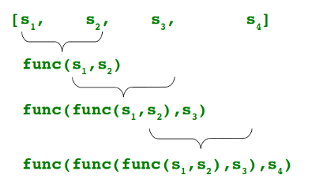

**Ejemplos**

In [87]:
from functools import reduce
lista = [47,11,42,13]

# Realiza la suma de los elementos de una lista
val = reduce(lambda x, y: x + y, lista)
print('suma de lista: ', val)

# Determinar el máximo de una lista de valores numéricos 
f = reduce(lambda x, y: max(x, y), lista)
print('El máximo valor de la lista es:', f )

# Calcular el producto de una lista 
val2 = reduce(lambda x, y: x * y, lista)

print('El producto de la lista es:', val2)

suma de lista:  113
El máximo valor de la lista es: 47
El producto de la lista es: 282282


In [85]:
max(13, 78)

78

> Página donde pueden profundizar un poco más acerca de las funciones `map, filter, and reduce` [Enlace](http://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php)

## Comparación tiempo de simulación para grandes cantidades de datos 

Lo que se pretende en este apartado es mostrar la forma mas eficiente de realizar cálculos cuando se tiene gran cantidad de datos. Se comparán las técnicas tales como: ciclos for, paquete numpy, compresión de listas y la función map. Para efectos de simulación se desea comparar los tiempos necesarios para calular el valor del $log_{10}$ para un vector de tamaño $1\times 10^7$, que contiene valores aleatorios flotantes obtenidos mediante un distribución normal, para las cuatro técnicas mencionadas anteriormente.

In [88]:
# Número de muestras
import time
import math
N = 10**7
# Lista con valores aleatorios
l1 = np.random.normal(50,5,N)
speed = []

############ Usando ciclo for
t1 = time.time()
l2 = []
for item in l1:
    l2.append(math.log10(item))
t2 = time.time()
print("Con ciclos for y agregando los resutados toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Con ciclos for y agregando los resutados toma 2.0193049907684326 segundos


In [89]:
########### Usando numpy
t1 = time.time()
a2 = np.log10(l1)
t2 = time.time()
print("Usando la librería Numpy y el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando la librería Numpy y el método log10 toma 0.10238385200500488 segundos


In [90]:
########### Usando comprensión de listas
t1 = time.time()
cl = [math.log10(i) for i in l1]
t2 = time.time()
print("Usando compresión de listas toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando compresión de listas toma 1.4573750495910645 segundos


In [91]:
########### Usando map function 
t1 = time.time()
m1 = list(map(lambda x:math.log10(x),l1))
t2 = time.time()
print("Usando la función map para el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando la función map para el método log10 toma 1.7069110870361328 segundos


In [92]:
########### Usando pandas
import pandas as pd
pandas = pd.Series(l1)

t1 = time.time()
pandas = pandas.apply(math.log10)
t2 = time.time()

print("Usando pandas toma {} segundos".format(t2-t1))
speed.append(t2-t1)
# pandas

Usando pandas toma 1.784956932067871 segundos


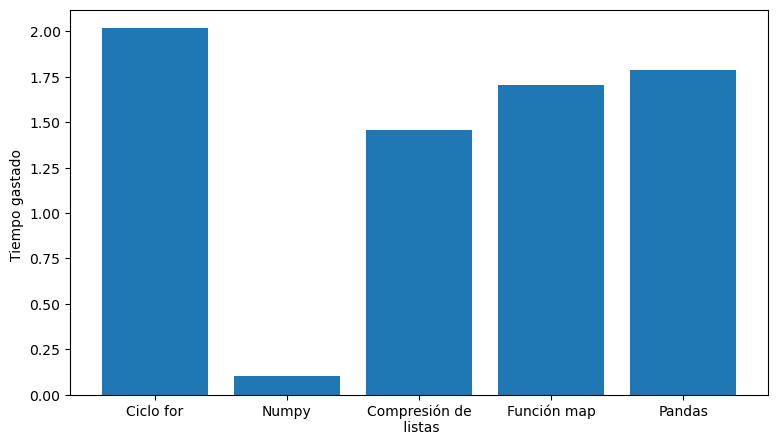

In [93]:
ind = np.arange(1, 6)
plt.figure(figsize=[9,5])
plt.bar(ind, speed)
plt.xticks(ind,['Ciclo for', 'Numpy', 'Compresión de\n listas','Función map', 'Pandas'])
plt.ylabel('Tiempo gastado ')
plt.show()

## Compresión de tuplas y Compresión de diccionarios

In [99]:
diccionarios = {name:i for i, name in enumerate(['Carlos', 'Adriana', 'Pepito'])}
diccionarios

tuplas = (i for i in range(10))
print(*tuplas)

conjunto = {i for i in range(10)}
conjunto

set([1,1,2,3,5,4,4,8,5,6,7,5,44,5])

0 1 2 3 4 5 6 7 8 9


{1, 2, 3, 4, 5, 6, 7, 8, 44}

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga
</footer>